In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [42]:
def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])

    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
    colums = np.genfromtxt(
        file_name_dataset, delimiter=",", max_rows=1, dtype=str
    ).tolist()
    N = len(data)

    print(f"Number of rows in the dataset: {N}")

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y, data, colums

In [43]:
X, y, data, columns = prepare_data("advertising.csv")
df = pd.DataFrame(data, columns=columns)
df.head()  # Display the first few rows of the table

Number of rows in the dataset: 200


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [44]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b


def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result


def compute_loss(y, y_hat):
    # MSE loss
    loss = (y_hat - y) ** 2
    return loss


# compute gradient
def compute_gradient(xi, y, y_hat):
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi


# update weights
def update_weight(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

In [45]:
def implement_linear_regression(
    X_data, y_data, epoch_max=50, lr=1e-5, min_lr=1e-10, epoch_to_decrease_lr=5
):
    losses = []
    w1, w2, w3, b = initialize_params()
    # w1: 0.06081235754988527, w2: 0.12503139892711163, w3: 0.0022029087986413665, b: 3.2753444143209567
    print(f"init w1: {w1}, w2: {w2}, w3: {w3}, b: {b}")

    N = len(y_data)
    # epochs_not_improve = 0
    # min_loss = float("inf")

    for epoch in range(epoch_max):
        loss_this_epoch = 0
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # dự đoán giá trị y_hat và tính toán loss
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss(y, y_hat)

            # tính toán gradient
            dl_dw1 = compute_gradient(x1, y, y_hat)
            dl_dw2 = compute_gradient(x2, y, y_hat)
            dl_dw3 = compute_gradient(x3, y, y_hat)
            dl_db = compute_gradient(1, y, y_hat)

            # cập nhật trọng số
            w1 = update_weight(w1, dl_dw1, lr)
            w2 = update_weight(w2, dl_dw2, lr)
            w3 = update_weight(w3, dl_dw3, lr)
            b = update_weight(b, dl_db, lr)

            # tổng loss trong epoch
            loss_this_epoch += loss

        loss_this_epoch /= N
        losses.append(loss_this_epoch)

        # cập nhật learning rate nếu loss không giảm sau vài epoch
        # if loss_this_epoch < min_loss:
        #     min_loss = loss_this_epoch
        #     epochs_not_improve = 0
        # else:
        #     epochs_not_improve += 1

        # if epochs_not_improve >= epoch_to_decrease_lr:
        #     lr = max(lr / 10, min_lr)
        #     print(f"Learning rate decreased to {lr}")
        #     epochs_not_improve = 0
        # if epoch % 10 == 0:
        #     print(
        #         f"epoch: {epoch}, loss: {loss_this_epoch}, w1: {w1}, w2: {w2}, w3: {w3}, b: {b}"
        #     )

    return w1, w2, w3, b, losses

In [48]:
w1, w2, w3, b, losses = implement_linear_regression(X, y, epoch_max=100, lr=1e-5)

init w1: 0.0020845368660954602, w2: -0.019173083486517053, w3: 0.006141598607390823, b: 0


w1 =  0.0734950792472428
w2 =  0.1577180658226157
w3 =  0.016906449118711572
b =  0.27293965080079197


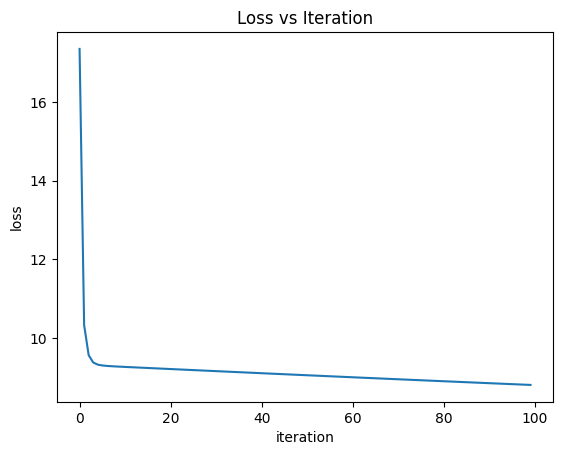

In [49]:
print("w1 = ", w1)
print("w2 = ", w2)
print("w3 = ", w3)
print("b = ", b)

plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Loss vs Iteration")
plt.show()